### Import libraries

In [1]:
import os
import requests
from datetime import datetime, timedelta
from glob import glob
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### load and combine csvs
### then save to csv

In [2]:
#csv_files = glob("./MISO_quarterly_data/*DA*.csv")  

In [3]:
"""import re
from io import StringIO

def clean_file(path):
    with open(path, "r") as fh:
        txt = fh.read()
    # remove commas *inside* numbers (e.g. 1,234.56 → 1234.56)
    return re.sub(r'(?<=\d),(?=\d{3}(?:\.\d+)?\b)', '', txt)

dfs = {}
for f in csv_files:
    clean_txt = clean_file(f)
    temp_df = pd.read_csv(StringIO(clean_txt), low_memory=False)
    dfs[f] = temp_df[temp_df['NODE'] == 'NSP.NWELOAD']
"""

'import re\nfrom io import StringIO\n\ndef clean_file(path):\n    with open(path, "r") as fh:\n        txt = fh.read()\n    # remove commas *inside* numbers (e.g. 1,234.56 → 1234.56)\n    return re.sub(r\'(?<=\\d),(?=\\d{3}(?:\\.\\d+)?\x08)\', \'\', txt)\n\ndfs = {}\nfor f in csv_files:\n    clean_txt = clean_file(f)\n    temp_df = pd.read_csv(StringIO(clean_txt), low_memory=False)\n    dfs[f] = temp_df[temp_df[\'NODE\'] == \'NSP.NWELOAD\']\n'

In [4]:
#combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
#combined_df.to_csv("./data_gold/Node_DA.csv")

## explore RT node data

In [2]:
node_RT = pd.read_csv("../data/Node_RT.csv")
node_DA = pd.read_csv("../data/Node_DA_LMP.csv")

In [3]:
node_RT_LMP = node_RT[node_RT['VALUE'] == 'LMP']
node_RT_LMP = node_RT_LMP.drop(columns=node_RT_LMP.columns[0])#.set_index('MARKET_DAY')
node_RT_LMP['date'] = pd.to_datetime(node_RT_LMP['MARKET_DAY']) 
node_RT_LMP['Month'] = node_RT_LMP['date'].dt.month
node_DA_LMP = node_DA
node_DA_LMP['date'] = pd.to_datetime(node_DA_LMP['MARKET_DAY'])
node_DA_LMP['Month'] = node_DA_LMP['date'].dt.month
node_DA_LMP.drop(columns=["source_zip"], inplace=True)

In [4]:
node_RT_LMP.head()

,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24,date,Month
0,10/1/2022,NSP.NWELOAD,Loadzone,LMP,17.69,13.95,22.03,33.19,39.61,42.65,...,47.95,50.86,52.23,46.37,38.11,35.04,22.29,24.85,2022-10-01,10
3,10/2/2022,NSP.NWELOAD,Loadzone,LMP,13.95,24.15,23.93,23.76,24.22,26.24,...,46.88,57.03,50.22,46.5,27.70,3.76,-3.77,-5.24,2022-10-02,10
6,10/3/2022,NSP.NWELOAD,Loadzone,LMP,-7.72,-9.24,-7.93,-3.80,-2.91,18.86,...,53.72,63.74,126.80,53.33,38.58,48.7,38.09,21.06,2022-10-03,10
9,10/4/2022,NSP.NWELOAD,Loadzone,LMP,32.22,25.06,32.58,27.78,27.99,29.48,...,60.71,72.3,64.68,120.26,49.77,45.95,47.16,46.71,2022-10-04,10
12,10/5/2022,NSP.NWELOAD,Loadzone,LMP,41.72,37.47,32.99,33.93,36.3,65.63,...,59.83,63.48,61.48,80.77,109.09,47.44,34.41,31.65,2022-10-05,10


In [5]:
node_DA_LMP.head()

,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24,date,Month
0,10/1/2022,NSP.NWELOAD,Loadzone,LMP,26.23,26.36,27.48,28.07,30.72,33.15,...,46.64,51.31,51.11,45.59,38.73,28.53,23.63,23.11,2022-10-01,10
1,10/2/2022,NSP.NWELOAD,Loadzone,LMP,23.31,22.69,24.87,25.31,27.82,28.90,...,46.46,59.67,62.23,50.72,41.04,30.59,20.68,18.41,2022-10-02,10
2,10/3/2022,NSP.NWELOAD,Loadzone,LMP,7.02,7.78,8.20,11.31,19.78,30.68,...,63.91,71.42,77.23,63.58,49.66,41.60,29.13,27.66,2022-10-03,10
3,10/4/2022,NSP.NWELOAD,Loadzone,LMP,15.53,15.63,16.39,20.82,29.23,44.59,...,69.58,73.17,77.02,63.05,54.37,48.23,45.76,44.78,2022-10-04,10
4,10/5/2022,NSP.NWELOAD,Loadzone,LMP,36.77,35.53,33.56,34.78,39.71,54.43,...,68.03,68.47,69.01,60.72,49.12,43.26,33.95,29.17,2022-10-05,10


## quick attempt at simulation

### Empirical Mean and volatility

In [6]:
def monthly_stats(df):
    df = df.assign(
        DATE=pd.to_datetime(df['MARKET_DAY']),
        MONTH=lambda d: d['DATE'].dt.month
    )
    long = df.melt(
        ['DATE','MONTH'],
        [f'HE{i}' for i in range(1,25)],
        var_name='HOUR', value_name='PRICE'
    )
    long['PRICE'] = pd.to_numeric(long['PRICE'], errors='coerce')
    long = long.dropna(subset=['PRICE'])
    long['HOUR'] = long['HOUR'].str.extract(r'HE(\d+)').astype(int)

    stats = (
        long
        .groupby(['MONTH','HOUR'])['PRICE']
        .agg(mu='mean', sigma='std')
        .reset_index()
    )
    return stats


In [7]:
rt_stats = monthly_stats(node_RT_LMP)
da_stats = monthly_stats(node_DA_LMP)


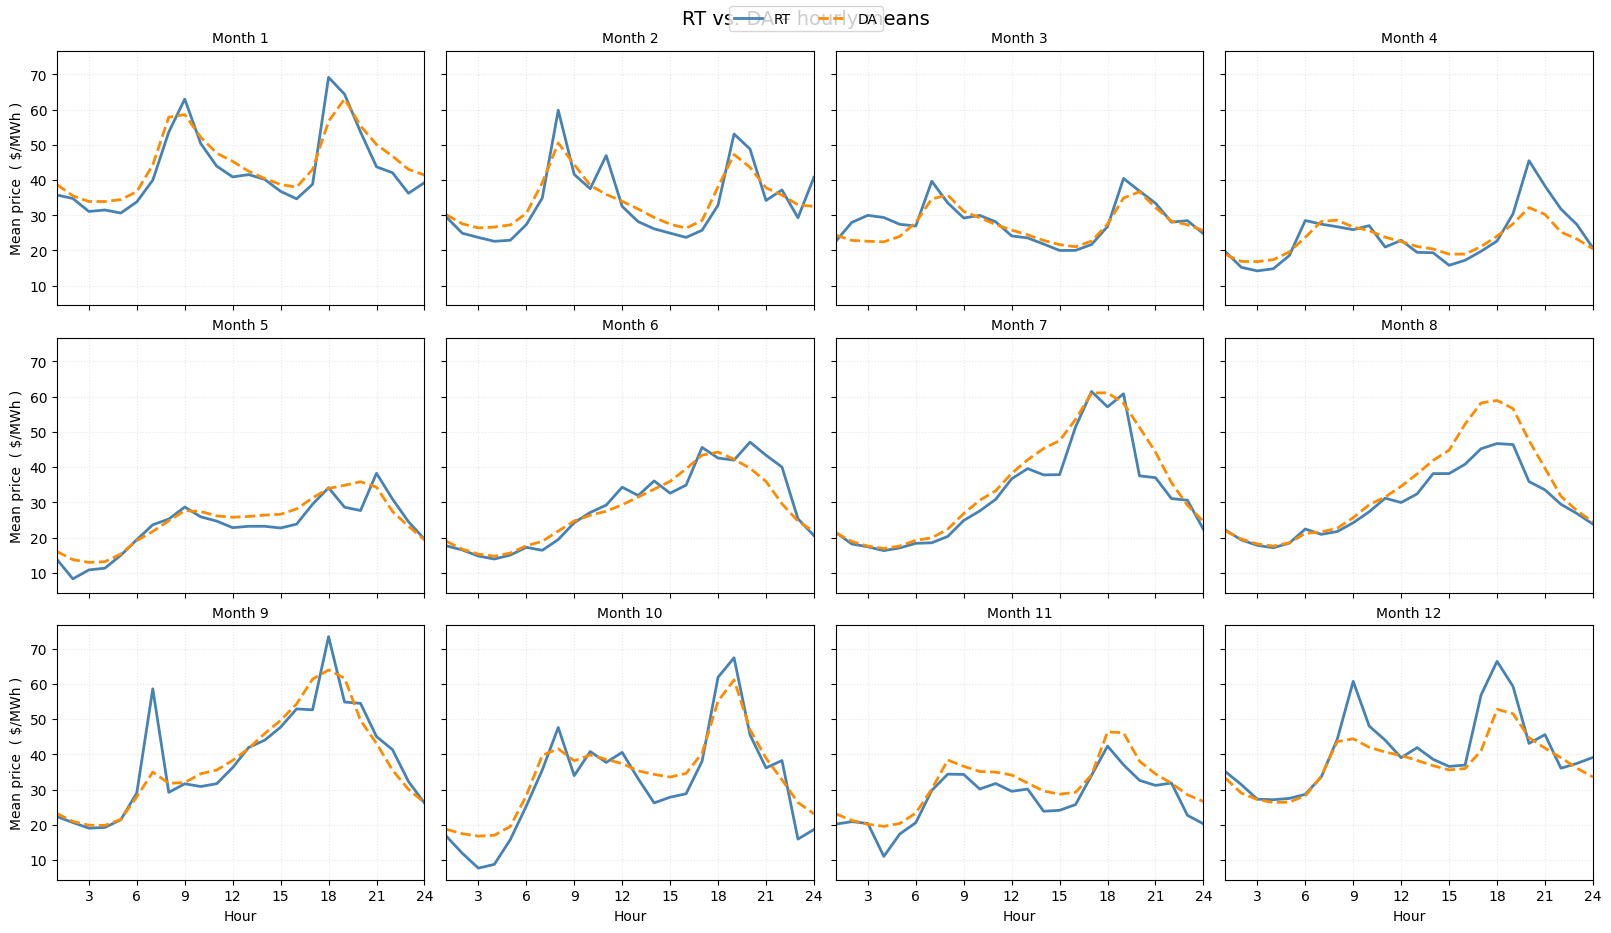

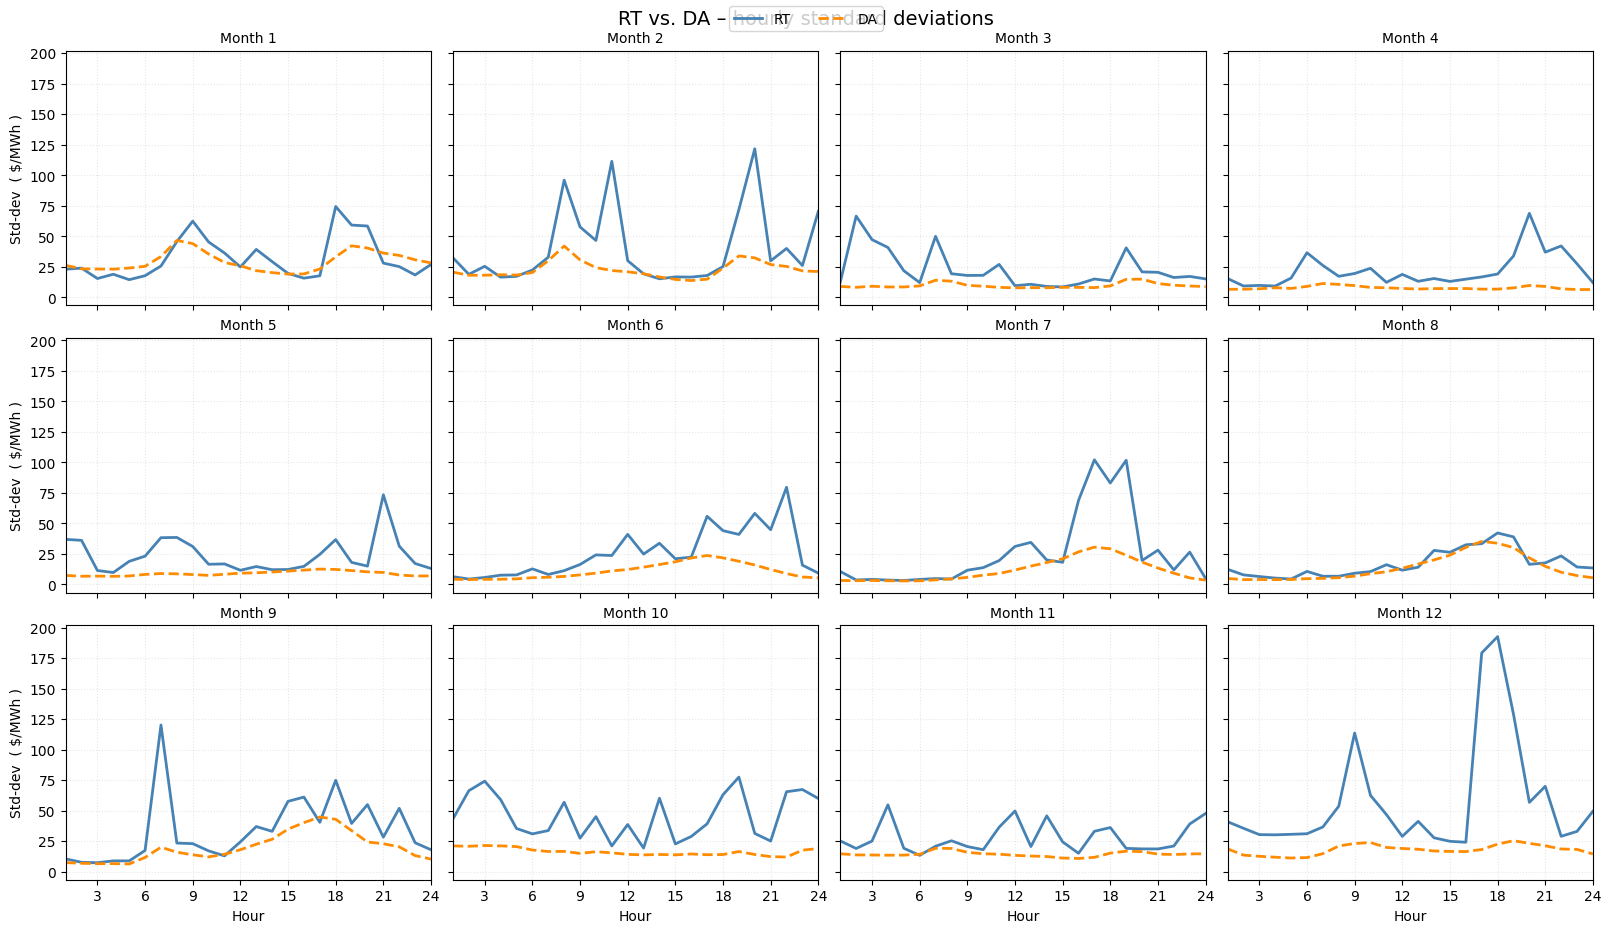

In [8]:

from matplotlib.ticker import MaxNLocator

def plot_monthly(rt_df, da_df, col, ylabel, title):
    """
    col      – 'mu' or 'sigma'
    ylabel   – axis label string
    title    – figure title
    """
    fig, axes = plt.subplots(
        3, 4, figsize=(16, 9), sharex=True, sharey=True,
        constrained_layout=True
    )
    axes = axes.ravel()

    for m in range(1, 13):
        ax = axes[m - 1]

        rt_m = rt_df[rt_df["MONTH"] == m].sort_values("HOUR")
        da_m = da_df[da_df["MONTH"] == m].sort_values("HOUR")

        ax.plot(rt_m["HOUR"], rt_m[col],
                lw=2, color="steelblue", label="RT")
        ax.plot(da_m["HOUR"], da_m[col],
                lw=2, ls="--", color="darkorange", label="DA")

        # cosmetics ------------
        ax.set_title(f"Month {m}", fontsize=10)
        ax.set_xlim(1, 24)
        ax.set_xticks(range(1, 25, 3))            # every 3 hours
        ax.xaxis.set_major_locator(MaxNLocator(nbins=8))
        ax.grid(ls=":", alpha=0.3)

        if m in (9, 10, 11, 12):                  # bottom row
            ax.set_xlabel("Hour")
        if m in (1, 5, 9):                        # left column
            ax.set_ylabel(ylabel)

    # single legend outside the grid
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=2, loc="upper center")
    fig.suptitle(title, fontsize=14, y=1.02)
    plt.show()

# -------------------------------------------------------------
# 3.  Call once for μ and once for σ
# -------------------------------------------------------------
plot_monthly(rt_stats, da_stats,
             col="mu",
             ylabel="Mean price  ( $/MWh )",
             title="RT vs. DA – hourly means")

plot_monthly(rt_stats, da_stats,
             col="sigma",
             ylabel="Std-dev  ( $/MWh )",
             title="RT vs. DA – hourly standard deviations")


### Fit logistic distribution (because it is like normal distribution but allowing fatter tail)

reshaping the dataset for fitting a distribution to historical prices

In [9]:
hour_cols = [f'HE{i}' for i in range(1, 25)]


DA_long  = (
    node_DA_LMP
    .melt(id_vars=['date', 'Month'], value_vars=hour_cols,
          var_name='Hour', value_name='LMP')
    .assign(Hour=lambda d: d['Hour'].str.extract(r'HE(\d+)').astype(int))
    .dropna(subset=['LMP'])
)

RT_long = (
    node_RT_LMP
    .melt(id_vars=['date', 'Month'], value_vars=hour_cols,
          var_name='Hour', value_name='LMP')
    .assign(Hour=lambda d: d['Hour'].str.extract(r'HE(\d+)').astype(int))
    .dropna(subset=['LMP'])
)

In [10]:
display(RT_long)
DA_long

,date,Month,Hour,LMP
0,2022-10-01,10,1,17.69
1,2022-10-02,10,1,13.95
2,2022-10-03,10,1,-7.72
3,2022-10-04,10,1,32.22
4,2022-10-05,10,1,41.72
...,...,...,...,...
21907,2025-03-27,3,24,26.77
21908,2025-03-28,3,24,19.82
21909,2025-03-29,3,24,35.58
21910,2025-03-30,3,24,18.06


,date,Month,Hour,LMP
0,2022-10-01,10,1,26.23
1,2022-10-02,10,1,23.31
2,2022-10-03,10,1,7.02
3,2022-10-04,10,1,15.53
4,2022-10-05,10,1,36.77
...,...,...,...,...
21907,2025-03-27,3,24,25.61
21908,2025-03-28,3,24,26.70
21909,2025-03-29,3,24,24.39
21910,2025-03-30,3,24,26.83


### Fit logistic regression to DA and RT prices

In [11]:
from scipy.stats import logistic

def fit_logistic(data):
    # 1) force numeric, turn bad tokens into NaN
    y = pd.to_numeric(data['LMP'], errors='coerce').values.astype(float)
    # 2) keep only finite values
    y = y[np.isfinite(y)]

    if len(y) < 2:                       # cannot fit with <2 obs.
        return pd.Series({
            'count'     : len(y),
            'loc'       : np.nan,
            'scale'     : np.nan,
            'mean_level': np.nan,
            'std_level' : np.nan,
        })

    loc, scale = logistic.fit(y)         # MLE
    scale = np.abs(scale)                # ensure scale is positive        
        
    mean_lvl   = loc
    std_lvl    = np.pi * scale / np.sqrt(3)

    return pd.Series({
        'count'     : len(y),
        'loc'       : loc,
        'scale'     : scale,
        'mean_level': mean_lvl,
        'std_level' : std_lvl,
    })

# ── Apply to DA and RT data ──────────────────────────────────────────
logistic_params_DA = (
    DA_long.groupby(['Month', 'Hour'])
           .apply(fit_logistic)
           .reset_index()
)

logistic_params_RT = (
    RT_long.groupby(['Month', 'Hour'])
           .apply(fit_logistic)
           .reset_index()
)

print(logistic_params_DA.head())
print(logistic_params_RT.head())


   Month  Hour  count        loc      scale  mean_level  std_level
0      1     1   93.0  34.041596  10.570095   34.041596  19.172032
1      1     2   93.0  31.454070   9.410284   31.454070  17.068367
2      1     3   93.0  30.092826   8.902294   30.092826  16.146975
3      1     4   93.0  30.102168   8.910084   30.102168  16.161105
4      1     5   93.0  30.526617   8.950619   30.526617  16.234626
   Month  Hour  count        loc     scale  mean_level  std_level
0      1     1   93.0  31.949410  9.733351   31.949410  17.654345
1      1     2   93.0  30.982648  9.882696   30.982648  17.925228
2      1     3   93.0  29.074990  7.487944   29.074990  13.581628
3      1     4   93.0  28.720657  8.344229   28.720657  15.134756
4      1     5   93.0  29.006259  7.405165   29.006259  13.431483


C:\Users\benja\AppData\Local\Temp\ipykernel_40916\2222740939.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fit_logistic)
C:\Users\benja\AppData\Local\Temp\ipykernel_40916\2222740939.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fit_logistic)


In [12]:
print(set(logistic_params_DA['count']))
print(set(logistic_params_RT['count']))

{85.0, 90.0, 60.0, 93.0, 62.0}
{90.0, 51.0, 93.0, 85.0, 52.0, 54.0, 55.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0}


In [13]:
# build hourly index for Jul 1 2025 → Jun 30 2026
rng = pd.date_range('2025-07-01', '2026-06-30 23:00', freq='h')
sim_df = pd.DataFrame({'DT': rng})
sim_df['Month'] = sim_df.DT.dt.month
sim_df['Hour']  = sim_df.DT.dt.hour + 1         # HE1–HE24

# attach monthly‐hourly DA stats
sim_df_DA = sim_df.merge(logistic_params_DA[['mean_level','scale','std_level','Month','Hour']], on=['Month','Hour'], how='left')
sim_df_RT = sim_df.merge(logistic_params_RT[['mean_level','scale','std_level','Month','Hour']], on=['Month','Hour'], how='left')

In [14]:
sim_df_DA
sim_df_RT

,DT,Month,Hour,mean_level,scale,std_level
0,2025-07-01 00:00:00,7,1,20.221164,3.081526,5.589270
1,2025-07-01 01:00:00,7,2,18.496932,1.970788,3.574613
2,2025-07-01 02:00:00,7,3,17.465735,1.952241,3.540974
3,2025-07-01 03:00:00,7,4,16.649996,1.732977,3.143273
4,2025-07-01 04:00:00,7,5,17.103934,1.774391,3.218390
...,...,...,...,...,...,...
8755,2026-06-30 19:00:00,6,20,35.042342,20.627606,37.414339
8756,2026-06-30 20:00:00,6,21,33.387631,16.767639,30.413134
8757,2026-06-30 21:00:00,6,22,28.629813,15.254027,27.667744
8758,2026-06-30 22:00:00,6,23,22.926540,5.261135,9.542643


## Check profits buying only in the DA market

In [24]:
# assumptions
n_miners    = 1000
power_mw    = n_miners * 3.25/1000          # 3.25 kW each → 3.25 MW total
btc_per_day = n_miners * 0.00008            # BTC/day total
btc_price0  = 93_000                        # starting BTC/USD
sigma_daily = 0.01                         # 0.1% per day
sigma_hour  = sigma_daily / np.sqrt(24)     # convert to hourly vol

hours   = len(sim_df_DA)
n_sims  = 10_000
profits_DA = np.empty(n_sims)

hourly_paths = []

np.random.seed(42)  # for reproducibility
for i in range(n_sims):
    # 1) simulate BTC/USD path over each hour (GBM w/ zero drift)
    eps        = np.random.normal(0, sigma_hour, size=hours)
    price_fac  = np.exp(eps)                      # multiplicative factors
    btc_path   = btc_price0 * price_fac.cumprod() # size: (hours,)

    # 2) sample DA LMP each hour
    P_da       = np.random.logistic(sim_df_DA.mean_level, sim_df_DA.scale)

    # 3) compute revenue & cost per hour
    rev_hourly = btc_per_day * btc_path / 24      # $ revenue each hour
    cost_hourly= P_da * power_mw

    # 4) annual profit for this sim
    profits_DA[i] = (rev_hourly - cost_hourly).sum()

    hourly_paths.append((rev_hourly - cost_hourly))

# summary
print("Mean profit:  ", profits_DA.mean())

print("Profit σ:     ", profits_DA.std())


Mean profit:   1856302.5957236039
Profit σ:      306238.42895713064


In [59]:
rng     = np.random.default_rng(42)

# --------------------------------------------
# 1.  Simulate *all* BTC paths at once
# --------------------------------------------
eps         = rng.normal(0, sigma_hour, size=(n_sims, hours))
btc_paths   = btc_price0 * np.exp(eps).cumprod(axis=1)     # (n_sims,hours)

# --------------------------------------------
# 2.  Draw Day-Ahead LMPs for every sim & hour
#     shape → broadcast to (n_sims, hours)
# --------------------------------------------
loc_da   = sim_df_DA['mean_level'].values           # (hours,)
scale_da = sim_df_DA['scale'].values          # ensure positive (hours,)

P_da = rng.logistic(loc_da, scale_da, size=(n_sims, hours))  # (n_sims,hours)

# --------------------------------------------
# 3.  Revenue, cost, P&L
# --------------------------------------------
rev_hourly  = (btc_per_day / 24) * btc_paths        # $
cost_hourly = power_mw * P_da                       # $

profits = (rev_hourly - cost_hourly).sum(axis=1)    # (n_sims,)

# --------------------------------------------
# 4.  Summary statistics
# --------------------------------------------
print(f"Mean profit:  {profits.mean():,.0f} $")
print(f"Profit σ   :  {profits.std():,.0f} $")

Mean profit:  1,835,890 $
Profit σ   :  30,153 $


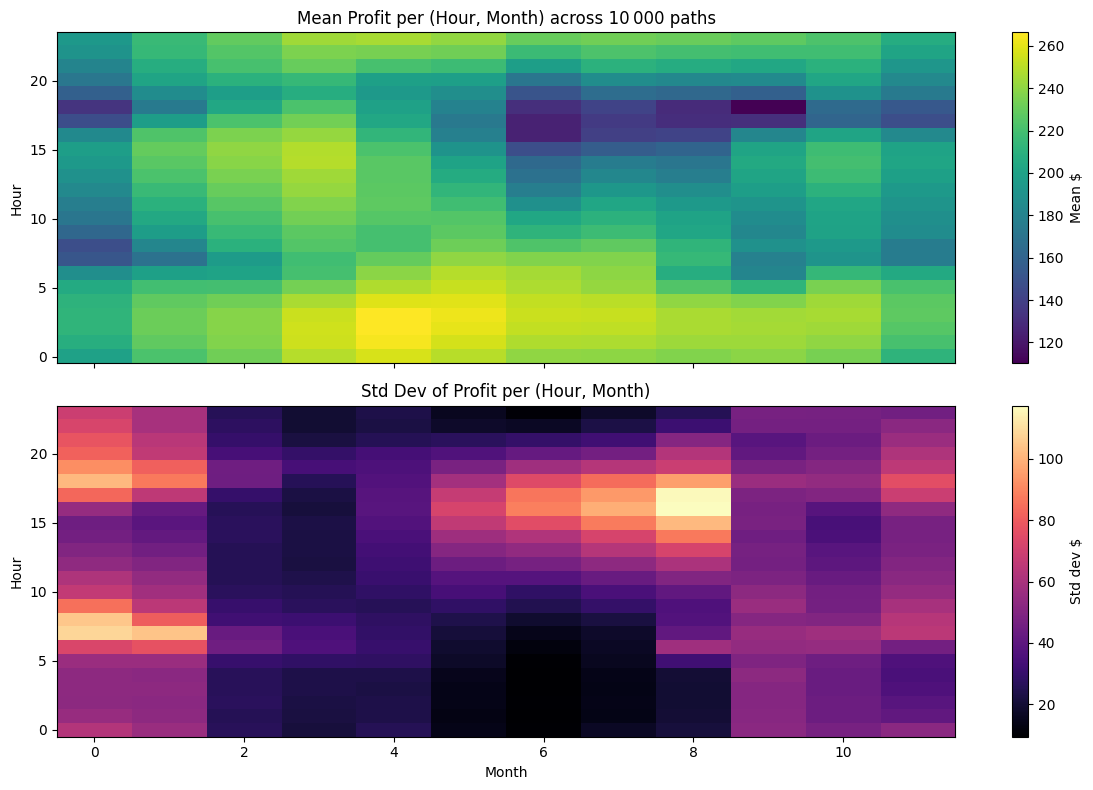

In [60]:
pnl_hourly = rev_hourly - cost_hourly

# 1) Flatten the profit matrix and replicate Month/Hour labels
month_arr = sim_df_DA['Month'].values            # (hours,)
hour_arr  = sim_df_DA['Hour' ].values            # (hours,)

month_rep = np.tile(month_arr, pnl_hourly.shape[0])  # (n_sims*hours,)
hour_rep  = np.tile(hour_arr,  pnl_hourly.shape[0])

pnl_flat  = pnl_hourly.ravel()                       # (n_sims*hours,)

df_stats_in = pd.DataFrame({
    'Month': month_rep,
    'Hour' : hour_rep,
    'PNL'  : pnl_flat
})

# 2) Group by (Month, Hour) and compute mean / std across all paths
grouped = df_stats_in.groupby(['Month', 'Hour'])['PNL']
stats   = grouped.agg(['mean', 'std']).reset_index()

# 3) Pivot for a heat‑map‑like table (Hour rows, Month columns)
mean_pivot = stats.pivot(index='Hour', columns='Month', values='mean')
std_pivot  = stats.pivot(index='Hour', columns='Month', values='std')

# 4) Plot mean and std as heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

im1 = ax1.imshow(mean_pivot, aspect='auto', origin='lower',
                 cmap='viridis')
ax1.set_title('Mean Profit per (Hour, Month) across 10 000 paths')
ax1.set_ylabel('Hour')
fig.colorbar(im1, ax=ax1, label='Mean $')

im2 = ax2.imshow(std_pivot, aspect='auto', origin='lower',
                 cmap='magma')
ax2.set_title('Std Dev of Profit per (Hour, Month)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Hour')
fig.colorbar(im2, ax=ax2, label='Std dev $')

plt.tight_layout()
plt.show()

# 5) Optional: interactive DataFrame preview
# import ace_tools as tools
# tools.display_dataframe_to_user("Hour‑Month Profit Statistics", stats.head())


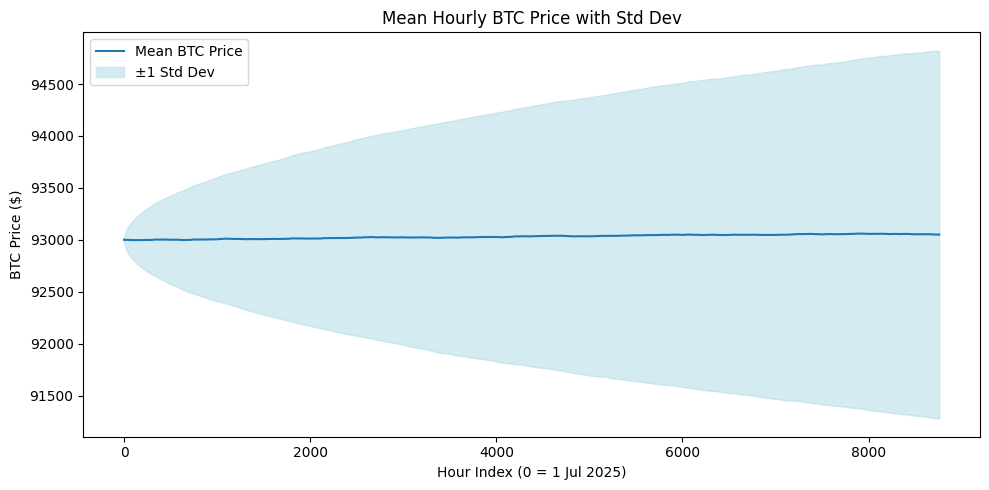

In [38]:
# btc_paths : shape (n_sims, hours)
hourly_btc_mean = btc_paths.mean(axis=0)     # length = hours
hourly_btc_std  = btc_paths.std(axis=0)

# Wrap in a DataFrame for easy viewing / export
hourly_btc_stats = pd.DataFrame({
    'Hour_Index': np.arange(hours),          # 0 … hours-1
    'BTC_Mean'  : hourly_btc_mean,
    'BTC_Std'   : hourly_btc_std,
})

plt.figure(figsize=(10, 5))
plt.plot(hourly_btc_stats['Hour_Index'], hourly_btc_stats['BTC_Mean'], label='Mean BTC Price')  
plt.fill_between(hourly_btc_stats['Hour_Index'],
                 hourly_btc_stats['BTC_Mean'] - hourly_btc_stats['BTC_Std'],
                 hourly_btc_stats['BTC_Mean'] + hourly_btc_stats['BTC_Std'],
                 color='lightblue', alpha=0.5, label='±1 Std Dev')
plt.title('Mean Hourly BTC Price with Std Dev')
plt.xlabel('Hour Index (0 = 1 Jul 2025)')
plt.ylabel('BTC Price ($)')
plt.legend()
plt.tight_layout()
plt.show()


## Profits buying only in the RT

In [20]:
sim_df_RT

,DT,Month,Hour,mean_level,scale,std_level
0,2025-07-01 00:00:00,7,1,20.221164,3.081526,5.589270
1,2025-07-01 01:00:00,7,2,18.496932,1.970788,3.574613
2,2025-07-01 02:00:00,7,3,17.465735,1.952241,3.540974
3,2025-07-01 03:00:00,7,4,16.649996,1.732977,3.143273
4,2025-07-01 04:00:00,7,5,17.103934,1.774391,3.218390
...,...,...,...,...,...,...
8755,2026-06-30 19:00:00,6,20,35.042342,20.627606,37.414339
8756,2026-06-30 20:00:00,6,21,33.387631,16.767639,30.413134
8757,2026-06-30 21:00:00,6,22,28.629813,15.254027,27.667744
8758,2026-06-30 22:00:00,6,23,22.926540,5.261135,9.542643


In [25]:
# assumptions
n_miners    = 1000
power_mw    = n_miners * 3.25/1000          # 3.25 kW each → 3.25 MW total (energy to use per hour)
btc_per_hour = n_miners * 0.00008 / 24           # BTC/day total
btc_price0  = 93_000                        # starting BTC/USD
sigma_daily = 0.01                         # 0.1% per day
sigma_hour  = sigma_daily / np.sqrt(24)     # convert to hourly vol

hours   = len(sim_df_RT)
n_sims  = 10_000
profits_RT = np.empty(n_sims)

hourly_paths = []
np.random.seed(42)  # for reproducibility

for i in range(n_sims):
    # 1) simulate BTC/USD path over each hour (GBM w/ zero drift)
    eps        = np.random.normal(0, sigma_hour, size=hours)
    price_fac  = np.exp(eps)                      # multiplicative factors
    btc_path   = btc_price0 * price_fac.cumprod() # size: (hours,)

    # 2) sample RT LMP each hour
    P_rt       = np.random.logistic(sim_df_RT.mean_level, sim_df_RT.std_level)

    # 3) compute revenue & cost per hour
    rev_hourly = btc_path * btc_per_hour      # $ revenue each hour : price of BTC * BTC produced per hour
    cost_hourly= P_rt * power_mw

    # 4) annual profit for this sim
    profits_RT[i] = (rev_hourly - cost_hourly).sum()

    hourly_paths.append((rev_hourly - cost_hourly))

# summary
print("Mean profit:  ", profits_RT.mean())

print("Profit σ:     ", profits_RT.std())

Mean profit:   1939019.5057962253
Profit σ:      306409.378487593


## Trying a smarter buying strategy

We still buy power on the DA, but instead of necessarly using it in the RT, we can decide wether to use elec to mine BTC or to sell in the RT (depending on which is profitable)

Therefore we have 2 options:
$$
\text{Mine BTC and earn Profit = } P_{BTC}*Q_{BTC} - P_{DA}*Q_{elec}
$$

Or 
$$
\text{Sell power on the RT earn Profit = } (P_{RT} - P_{DA})*Q_{elec}
$$

In [26]:
# assumptions
n_miners    = 1000
power_mw    = n_miners * 3.25/1000          # 3.25 kW each → 3.25 MW total (energy to use per hour)
btc_per_hour = n_miners * 0.00008 / 24           # BTC/day total
btc_price0  = 93_000                        # starting BTC/USD
sigma_daily = 0.01                         # 0.1% per day
sigma_hour  = sigma_daily / np.sqrt(24)     # convert to hourly vol

hours   = len(sim_df_RT)
n_sims  = 10_000
profits_OT = np.empty(n_sims)

hourly_paths = []

counting_options = []
np.random.seed(42)  # for reproducibility

for i in range(n_sims):
    # 1) simulate BTC/USD path over each hour (GBM w/ zero drift)
    eps        = np.random.normal(0, sigma_hour, size=hours)
    price_fac  = np.exp(eps)                      # multiplicative factors
    btc_path   = btc_price0 * price_fac.cumprod() # size: (hours,)

    # 2) sample RT LMP each hour
    P_rt       = np.random.logistic(sim_df_RT.mean_level, sim_df_RT.std_level)
    P_da       = np.random.logistic(sim_df_DA.mean_level, sim_df_DA.std_level)

    # 1st option: Mine bitcoin using DA prices
    rev_hourly = btc_path * btc_per_hour      # $ revenue each hour : price of BTC * BTC produced per hour
    cost_hourly= P_rt * power_mw
    Profits_1 = rev_hourly - cost_hourly
    
    # 2nd option: Sell power we bought at DA prices to the grid at RT prices
    Profits_2 = (P_da - P_rt) * power_mw

    # Keep the most profitable option
    profits_OT[i] = np.maximum(Profits_1, Profits_2).sum()
    
    # keep track of number of times each option was chosen
    count = np.count_nonzero(np.maximum(Profits_1 - Profits_2,0)) ## count number of times option 1 was chosen
    counting_options.append([count, hours - count])

    hourly_paths.append(np.maximum(Profits_1, Profits_2))

# summary
print("Mean profit:  ", profits_OT.mean())

print("Profit σ:     ", profits_OT.std())

print("Option 1 chosen: ", np.mean([x[0] for x in counting_options]))
print("Option 2 chosen: ", np.mean([x[1] for x in counting_options]))

Mean profit:   1961341.113970441
Profit σ:      297490.6779753145
Option 1 chosen:  8495.3415
Option 2 chosen:  264.6585


### Compare Strategies

In [52]:
rf = 0.04 
initial_investment = 500_000  # Initial investment in USD
rf_return = initial_investment * rf  # Risk-free return over the period
nb_hours = hours 
## the stats are on nb_hours of profits, so we need to annualize the stats
annualized_factor = (24*365) / hours  # Convert hours to annualized factor
profits_DA = profits_DA * annualized_factor
profits_RT = profits_RT * annualized_factor
profits_OT = profits_OT * annualized_factor

Comparison_table = pd.DataFrame(columns=["Mean Profits", "Std Profits", 'Sortino Ration Profits'], index=["DA", "RT", "OT"])
Comparison_table.loc["DA"] = [profits_DA.mean(), profits_DA.std(), (profits_DA.mean() -rf_return) / profits_DA.std()]
Comparison_table.loc["RT"] = [profits_RT.mean(), profits_RT.std(), (profits_RT.mean() -rf_return) / profits_RT.std()]
Comparison_table.loc["OT"] = [profits_OT.mean(), profits_OT.std(), (profits_OT.mean() - rf_return) / profits_OT.std()]

display(Comparison_table)

,Mean Profits,Std Profits,Sortino Ration Profits
DA,1856302.595724,306238.428957,5.996317
RT,1939019.505796,306409.378488,6.262927
OT,1961341.11397,297490.677975,6.525721


## Find breakeven price

If we take into account the risk-aversion (i.e a risky asset has to provide more returns), we could say the breakeven price is when:

Avg(profit) - Std(profit) - Asset_price = Asset_price*Rf

In [58]:
BreakEvenPrice = pd.DataFrame(columns=["Breakeven Price in K"], index=["DA", "RT", "OT"])
BreakEvenPrice.loc["DA"] = [(profits_DA.mean() -profits_DA.std())/ (1+rf)]
BreakEvenPrice.loc["RT"] = [(profits_RT.mean() - profits_RT.std()) / (1+rf)]
BreakEvenPrice.loc["OT"] = [(profits_OT.mean() - profits_OT.std()) / (1+rf)]

## display the breakeven prices in thousand USD
BreakEvenPrice = BreakEvenPrice / 1000  # Convert to thousand USD

display(BreakEvenPrice)

,Breakeven Price in K
DA,1490.446314
RT,1569.81743
OT,1599.856188
